<a href="https://colab.research.google.com/github/PrateekKumar135/Simulating-and-Analyzing-Lead-Demographics-for-E-Learning-Program-Insights/blob/main/Tech_Analogy_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Generation

In [56]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Define the attributes and their possible values
locations = ["Ahmedabad", "Surat", "Mumbai", "Jaipur", "Chandigarh", "Kolkata", "Lucknow", "Bengaluru", "Chennai"]
colleges = ["Christ Univ.", "Nama Univ.", "Xavier Univ.", "Charles Univ.", "St. Peter's College", "Martin Pete College", "Dhirubhai Ambani Univ."]
years_of_study = ["1st", "2nd", "3rd", "4th"]
program_interests = ["Data Science", "AI", "Mechanical Engineer", "Chemical Engineer", "Mathematics", "Computer Science", "Robotics", "Mechatronics"]
lead_sources = ["Instagram", "Whatsapp", "News advertising", "Google Form", "College Collaboration", "Mass-Mailing"]

# Generate the dataset
num_rows = 1100
data = {
    "Lead ID": [f"LD{i+1}" for i in range(num_rows)],
    "Location": [random.choice(locations) for _ in range(num_rows)],
    "College": [random.choice(colleges) for _ in range(num_rows)],
    "Year of Study": [random.choice(years_of_study) for _ in range(num_rows)],
    "Program Interest": [random.choice(program_interests) for _ in range(num_rows)],
    "Lead Source": [random.choice(lead_sources) for _ in range(num_rows)]
}

# Create a DataFrame
df = pd.DataFrame(data)

In [57]:
df.head(8)

,Lead ID,Location,College,Year of Study,Program Interest,Lead Source
0,LD1,Lucknow,St. Peter's College,2nd,Mathematics,Whatsapp
1,LD2,Bengaluru,Nama Univ.,3rd,Mechanical Engineer,Whatsapp
2,LD3,Bengaluru,Xavier Univ.,1st,Mechatronics,Whatsapp
3,LD4,Surat,Xavier Univ.,4th,Data Science,Mass-Mailing
4,LD5,Surat,Christ Univ.,2nd,Chemical Engineer,Mass-Mailing
5,LD6,Chennai,Nama Univ.,4th,Robotics,News advertising
6,LD7,Chandigarh,Xavier Univ.,2nd,Mechanical Engineer,Mass-Mailing
7,LD8,Jaipur,Charles Univ.,2nd,Chemical Engineer,College Collaboration


# Demographic Analysis

In [58]:
# Analyze the distribution of lead sources based on location, college, and year of study
# Group by location and lead source
location_lead_source = df.groupby(["Location", "Lead Source"]).size().unstack(fill_value=0)
# Group by college and lead source
college_lead_source = df.groupby(["College", "Lead Source"]).size().unstack(fill_value=0)
# Group by year of study and lead source
year_lead_source = df.groupby(["Year of Study", "Lead Source"]).size().unstack(fill_value=0)


In [62]:
location_lead_source

Lead Source,College Collaboration,Google Form,Instagram,Mass-Mailing,News advertising,Whatsapp
Location,,,,,,
Ahmedabad,22,18,28,20,16,26
Bengaluru,19,18,31,21,19,21
Chandigarh,28,15,25,21,21,22
Chennai,26,20,14,21,19,14
Jaipur,19,29,19,26,22,15
Kolkata,24,11,12,25,23,18
Lucknow,19,17,24,17,13,21
Mumbai,20,24,14,17,16,19
Surat,27,22,20,28,18,16


In [63]:
college_lead_source

Lead Source,College Collaboration,Google Form,Instagram,Mass-Mailing,News advertising,Whatsapp
College,,,,,,
Charles Univ.,24,32,29,33,16,19
Christ Univ.,31,20,20,19,19,23
Dhirubhai Ambani Univ.,32,25,25,28,28,22
Martin Pete College,28,33,25,33,17,29
Nama Univ.,38,31,23,29,26,35
St. Peter's College,27,19,34,30,29,20
Xavier Univ.,24,14,31,24,32,24


In [64]:
year_lead_source

Lead Source,College Collaboration,Google Form,Instagram,Mass-Mailing,News advertising,Whatsapp
Year of Study,,,,,,
1st,57,42,49,45,49,43
2nd,43,50,53,52,44,37
3rd,60,40,47,53,36,47
4th,44,42,38,46,38,45


### Observations and Patterns

#### **1. Lead Source by Location**
- **Top Performing Locations for Lead Sources:**
  - **College Collaboration:** Chandigarh (28), Surat (27), and Chennai (26) are strong performers.
  - **Google Form:** Jaipur (29) and Surat (22) show the highest engagement.
  - **Instagram:** Ahmedabad (28) and Bengaluru (31) lead in engagement, indicating strong social media influence in these regions.
  - **Mass-Mailing:** Surat (28) and Jaipur (26) are the most responsive.
  - **News Advertising:** Kolkata (23) and Jaipur (22) have higher engagement compared to other locations.
  - **Whatsapp:** Ahmedabad (26) and Chandigarh (22) perform well.

- **Anomalies:**
  - **Kolkata:** Instagram (12) and Google Form (11) have significantly lower engagement compared to other cities.
  - **Lucknow:** News Advertising (13) and Google Form (17) are notably low-performing.

---

#### **2. Lead Source by College**
- **Top Performing Colleges for Lead Sources:**
  - **College Collaboration:** Nama Univ. (38) and Dhirubhai Ambani Univ. (32) dominate.
  - **Google Form:** Martin Pete College (33) and Charles Univ. (32) excel.
  - **Instagram:** St. Peter's College (34) and Charles Univ. (29) show high engagement.
  - **Mass-Mailing:** Martin Pete College (33) and Charles Univ. (33) lead.
  - **News Advertising:** Xavier Univ. (32) and Nama Univ. (26) are the most responsive.
  - **Whatsapp:** Nama Univ. (35) and Martin Pete College (29) perform best.

- **Anomalies:**
  - **Xavier Univ.:** Google Form (14) and News Advertising (16) have unusually low engagement compared to other lead sources.
  - **Christ Univ.:** Mass-Mailing (19) and News Advertising (19) underperform relative to other sources.

---

#### **3. Lead Source by Year of Study**
- **Top Performing Years for Lead Sources:**
  - **College Collaboration:** 3rd-year students (60) show the highest engagement.
  - **Google Form:** 2nd-year students (50) lead slightly over 1st-year students (42).
  - **Instagram:** 2nd-year (53) and 1st-year (49) students are highly engaged.
  - **Mass-Mailing:** 3rd-year (53) and 2nd-year (52) students perform best.
  - **News Advertising:** 1st-year (49) students have the highest interest.
  - **Whatsapp:** 1st-year (43) and 4th-year (45) students are the most responsive.

- **Anomalies:**
  - **3rd-year Students:** News Advertising (36) shows a sharp drop compared to other lead sources.
  - **4th-year Students:** Instagram (38) engagement is notably lower than other sources.

---

### Significant Patterns
1. **Regional Preferences:**
   - **Surat and Jaipur** are highly responsive to **Mass-Mailing** and **Google Form**, making these regions strong targets for these channels.
   - **Ahmedabad and Bengaluru** excel in **Instagram**, indicating a strong social media presence in these cities.

2. **College-Specific Trends:**
   - **Nama Univ.** shows consistently high engagement across all lead sources, especially in **Whatsapp** and **College Collaboration**.
   - **Xavier Univ.** underperforms in **Google Form** and **News Advertising**, suggesting a need to reevaluate strategies for these sources.

3. **Year-Based Engagement:**
   - **3rd-year students** are the most engaged across most lead sources, particularly **College Collaboration** and **Mass-Mailing**.
   - **1st-year students** respond best to **News Advertising**, indicating they may be more impressionable to traditional advertising methods.

---

### Recommendations
1. **Channel Optimization:**
   - Focus on **Instagram** in **Ahmedabad and Bengaluru** to capitalize on their high engagement.
   - Strengthen **Mass-Mailing** efforts in **Surat and Jaipur**, as these regions are particularly responsive.

2. **College-Specific Strategies:**
   - Invest more in **Whatsapp** and **College Collaboration** for **Nama Univ.** to maximize ROI.
   - Address low engagement in **Xavier Univ.** by tailoring **Google Form** and **News Advertising** campaigns.

3. **Target Year-Specific Campaigns:**
   - Emphasize **College Collaboration** and **Mass-Mailing** for **3rd-year students**, as they are the most engaged demographic.
   - Leverage **News Advertising** for **1st-year students** to capture early interest.

In [67]:
# Analyzing row-wise patterns for each DataFrame
location_patterns = pd.DataFrame(location_lead_source.idxmax(axis=1).rename("Location with Max Leads"))
college_patterns = pd.DataFrame(college_lead_source.idxmax(axis=1).rename("College with Max Leads"))
year_patterns = pd.DataFrame(year_lead_source.idxmax(axis=1).rename("Year with Max Leads"))

In [68]:
location_patterns

,Location with Max Leads
Location,
Ahmedabad,Instagram
Bengaluru,Instagram
Chandigarh,College Collaboration
Chennai,College Collaboration
Jaipur,Google Form
Kolkata,Mass-Mailing
Lucknow,Instagram
Mumbai,Google Form
Surat,Mass-Mailing


In [69]:
college_patterns

,College with Max Leads
College,
Charles Univ.,Mass-Mailing
Christ Univ.,College Collaboration
Dhirubhai Ambani Univ.,College Collaboration
Martin Pete College,Google Form
Nama Univ.,College Collaboration
St. Peter's College,Instagram
Xavier Univ.,News advertising


In [70]:
year_patterns

,Year with Max Leads
Year of Study,
1st,College Collaboration
2nd,Instagram
3rd,College Collaboration
4th,Mass-Mailing


<ipython-input-71-b49a45848779>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=location_patterns, x="Location with Max Leads", palette="viridis")


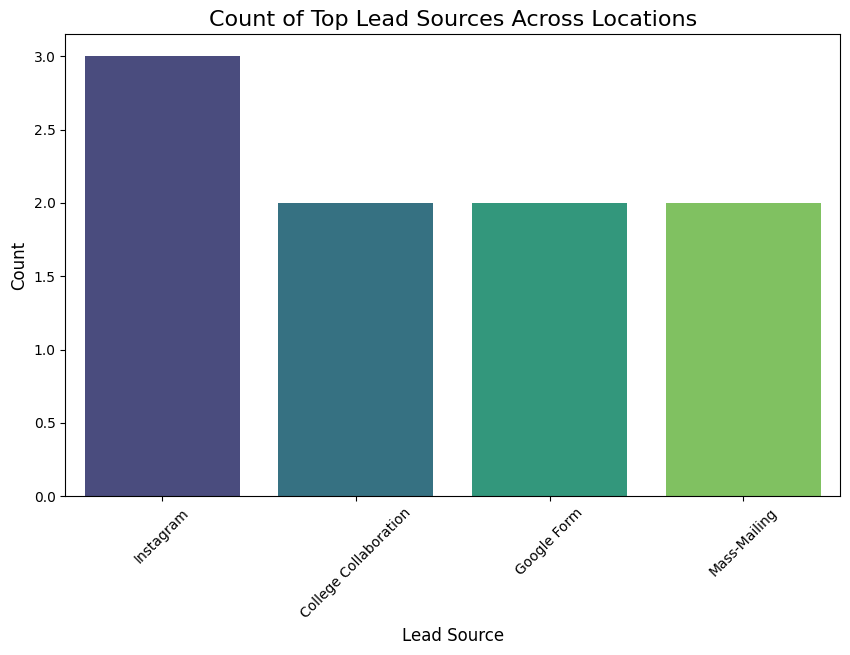

In [71]:
# Plot using seaborn countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=location_patterns, x="Location with Max Leads", palette="viridis")
plt.title("Count of Top Lead Sources Across Locations", fontsize=16)
plt.xlabel("Lead Source", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-72-fdfc90d75998>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=college_patterns, x="College with Max Leads", palette="viridis")


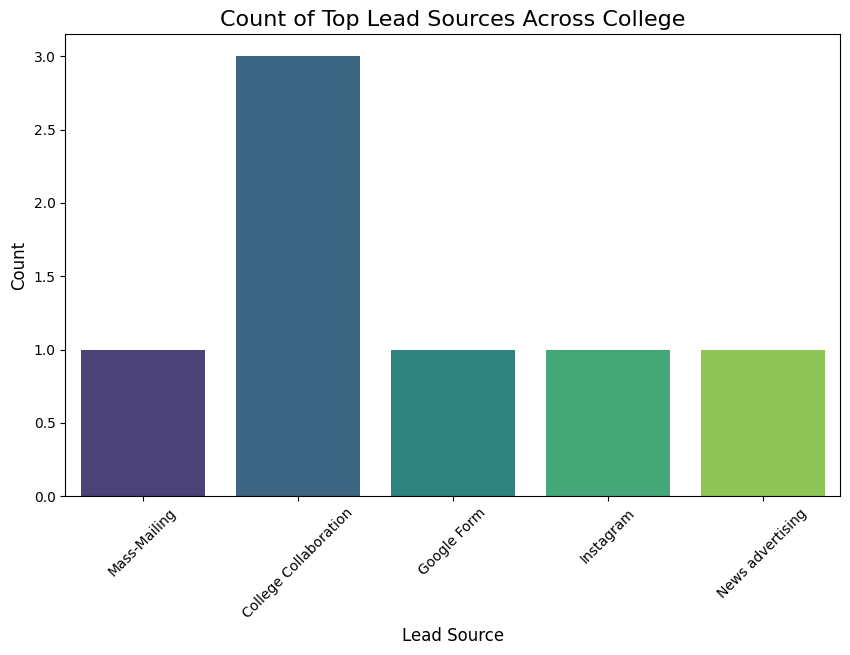

In [72]:
# Plot using seaborn countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=college_patterns, x="College with Max Leads", palette="viridis")
plt.title("Count of Top Lead Sources Across College", fontsize=16)
plt.xlabel("Lead Source", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-73-7ff6582c4d6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=year_patterns, x="Year with Max Leads", palette="viridis")


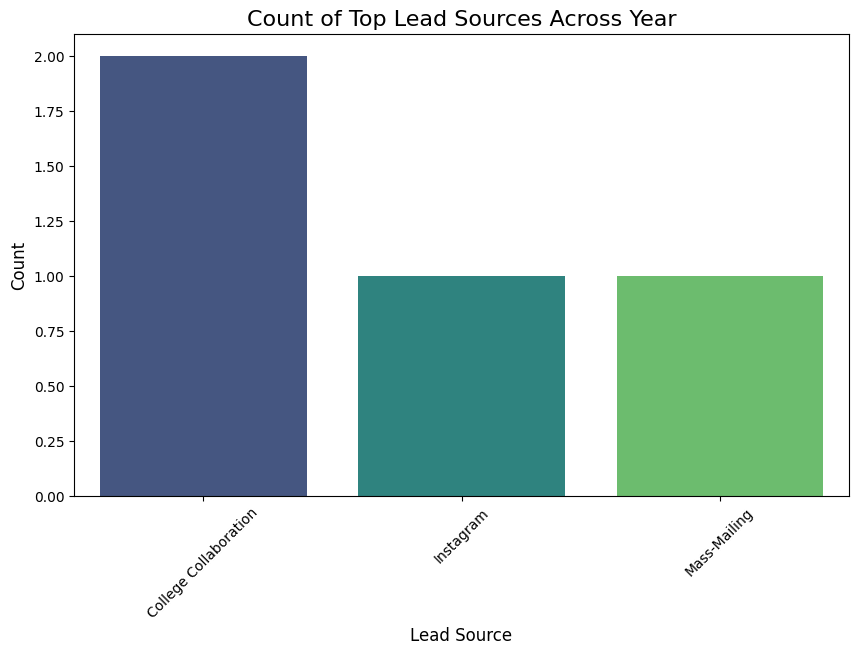

In [73]:
# Plot using seaborn countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=year_patterns, x="Year with Max Leads", palette="viridis")
plt.title("Count of Top Lead Sources Across Year", fontsize=16)
plt.xlabel("Lead Source", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [74]:
import numpy as np
# Calculate percentages for better insights
location_lead_source_percent = np.round(location_lead_source.div(location_lead_source.sum(axis=1), axis=0) * 100,2)
college_lead_source_percent = np.round(college_lead_source.div(college_lead_source.sum(axis=1), axis=0) * 100,2)
year_lead_source_percent = np.round(year_lead_source.div(year_lead_source.sum(axis=1), axis=0) * 100,2)

In [75]:
location_lead_source_percent

Lead Source,College Collaboration,Google Form,Instagram,Mass-Mailing,News advertising,Whatsapp
Location,,,,,,
Ahmedabad,16.92,13.85,21.54,15.38,12.31,20.00
Bengaluru,14.73,13.95,24.03,16.28,14.73,16.28
Chandigarh,21.21,11.36,18.94,15.91,15.91,16.67
Chennai,22.81,17.54,12.28,18.42,16.67,12.28
Jaipur,14.62,22.31,14.62,20.00,16.92,11.54
Kolkata,21.24,9.73,10.62,22.12,20.35,15.93
Lucknow,17.12,15.32,21.62,15.32,11.71,18.92
Mumbai,18.18,21.82,12.73,15.45,14.55,17.27
Surat,20.61,16.79,15.27,21.37,13.74,12.21


In [76]:
college_lead_source_percent

Lead Source,College Collaboration,Google Form,Instagram,Mass-Mailing,News advertising,Whatsapp
College,,,,,,
Charles Univ.,15.69,20.92,18.95,21.57,10.46,12.42
Christ Univ.,23.48,15.15,15.15,14.39,14.39,17.42
Dhirubhai Ambani Univ.,20.00,15.62,15.62,17.50,17.50,13.75
Martin Pete College,16.97,20.00,15.15,20.00,10.30,17.58
Nama Univ.,20.88,17.03,12.64,15.93,14.29,19.23
St. Peter's College,16.98,11.95,21.38,18.87,18.24,12.58
Xavier Univ.,16.11,9.40,20.81,16.11,21.48,16.11


In [77]:
year_lead_source_percent

Lead Source,College Collaboration,Google Form,Instagram,Mass-Mailing,News advertising,Whatsapp
Year of Study,,,,,,
1st,20.00,14.74,17.19,15.79,17.19,15.09
2nd,15.41,17.92,19.00,18.64,15.77,13.26
3rd,21.20,14.13,16.61,18.73,12.72,16.61
4th,17.39,16.60,15.02,18.18,15.02,17.79


In [78]:
# Identify significant patterns or anomalies
top_location_lead_source = pd.DataFrame([location_lead_source.idxmax(axis=1)],index=['Max_number_of_source'])
top_college_lead_source = pd.DataFrame([college_lead_source.idxmax(axis=1)],index=['Max_number_of_source'])
top_year_lead_source = pd.DataFrame([year_lead_source.idxmax(axis=1)],index=['Max_number_of_source'])

In [79]:
top_year_lead_source

Year of Study,1st,2nd,3rd,4th
Max_number_of_source,College Collaboration,Instagram,College Collaboration,Mass-Mailing


In [80]:
top_college_lead_source

College,Charles Univ.,Christ Univ.,Dhirubhai Ambani Univ.,Martin Pete College,Nama Univ.,St. Peter's College,Xavier Univ.
Max_number_of_source,Mass-Mailing,College Collaboration,College Collaboration,Google Form,College Collaboration,Instagram,News advertising


In [81]:
top_location_lead_source

Location,Ahmedabad,Bengaluru,Chandigarh,Chennai,Jaipur,Kolkata,Lucknow,Mumbai,Surat
Max_number_of_source,Instagram,Instagram,College Collaboration,College Collaboration,Google Form,Mass-Mailing,Instagram,Google Form,Mass-Mailing


### Analysis of Max Number of Sources

#### **1. Year of Study**
- **1st Year:** **College Collaboration** dominates, indicating early-stage students prefer structured, institutional outreach.
- **2nd Year:** **Instagram** takes the lead, showing that sophomores are more engaged on social media platforms.
- **3rd Year:** **College Collaboration** is again the most effective, suggesting that juniors rely on institutional recommendations as they approach career-defining years.
- **4th Year:** **Mass-Mailing** leads, highlighting the importance of direct communication for students nearing graduation.

**Insight:**  
- **College Collaboration** should be prioritized for 1st and 3rd-year students.
- **Instagram** campaigns should focus on 2nd-year students.
- **Mass-Mailing** is ideal for final-year students who may be actively seeking opportunities.

---

#### **2. College**
- **Charles Univ.:** **Mass-Mailing** is the most effective, suggesting students respond well to direct communication.
- **Christ Univ.:** **College Collaboration** dominates, highlighting strong institutional trust.
- **Dhirubhai Ambani Univ.:** **College Collaboration** is most effective, reinforcing the importance of institutional outreach.
- **Martin Pete College:** **Google Form** leads, indicating a preference for interactive or survey-based communication.
- **Nama Univ.:** **College Collaboration** is most effective, suggesting institutional trust is a key factor.
- **St. Peter's College:** **Instagram** dominates, showing strong engagement on social media.
- **Xavier Univ.:** **News Advertising** leads, indicating a unique responsiveness to traditional media.

**Insight:**  
- Tailor outreach strategies to the strengths of each college:
  - Focus on **College Collaboration** for **Christ Univ., Dhirubhai Ambani Univ.,** and **Nama Univ.**  
  - Leverage **Mass-Mailing** for **Charles Univ.**  
  - Use **Instagram** for **St. Peter's College** and **News Advertising** for **Xavier Univ.**

---

#### **3. Location**
- **Ahmedabad:** **Instagram** is the top source, reflecting a strong social media presence.
- **Bengaluru:** **Instagram** dominates, similar to Ahmedabad.
- **Chandigarh:** **College Collaboration** leads, showing reliance on institutional outreach.
- **Chennai:** **College Collaboration** is most effective, reinforcing institutional trust.
- **Jaipur:** **Google Form** leads, indicating a preference for interactive communication.
- **Kolkata:** **Mass-Mailing** dominates, showing effectiveness in direct communication.
- **Lucknow:** **Instagram** is the top source, showing strong social media engagement.
- **Mumbai:** **Google Form** leads, similar to Jaipur.
- **Surat:** **Mass-Mailing** is most effective, like Kolkata.

**Insight:**  
- **Instagram** should be prioritized for **Ahmedabad, Bengaluru,** and **Lucknow.**  
- **College Collaboration** is ideal for **Chandigarh** and **Chennai.**  
- **Mass-Mailing** is effective in **Kolkata** and **Surat.**  
- **Google Form** should be emphasized in **Jaipur** and **Mumbai.**

---

### Recommendations
1. **Year-Based Strategy:**
   - Focus on **College Collaboration** for 1st and 3rd-year students.
   - Launch targeted **Instagram** campaigns for 2nd-year students.
   - Use **Mass-Mailing** for final-year students to provide direct, actionable opportunities.

2. **College-Specific Campaigns:**
   - Use **Mass-Mailing** for **Charles Univ.** and **Google Form** for **Martin Pete College.**
   - Prioritize **Instagram** for **St. Peter's College** and **College Collaboration** for **Nama Univ., Christ Univ.,** and **Dhirubhai Ambani Univ.**

3. **Location-Based Outreach:**
   - Launch **Instagram** campaigns in **Ahmedabad, Bengaluru,** and **Lucknow.**
   - Emphasize **Mass-Mailing** in **Kolkata** and **Surat.**
   - Use **Google Form** for **Jaipur** and **Mumbai.**
   - Rely on **College Collaboration** in **Chennai** and **Chandigarh.**


# Program Analysis

<ipython-input-82-6d72c10f8b58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['Program Interest'], palette="viridis", legend='brief')


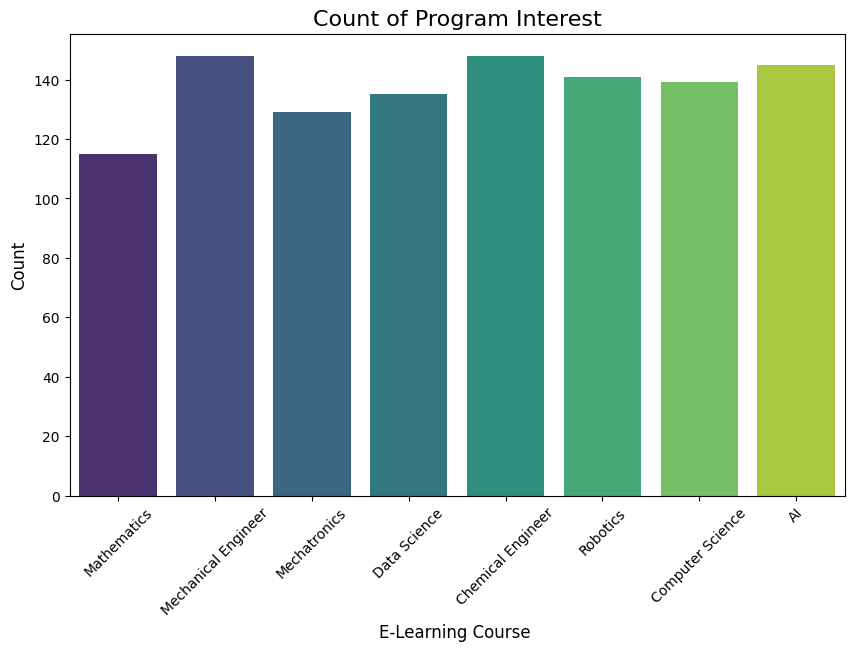

In [82]:
# Plot using seaborn countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['Program Interest'], palette="viridis", legend='brief')
plt.title("Count of Program Interest", fontsize=16)
plt.xlabel("E-Learning Course ", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [83]:
# Analyze interest levels for various e-learning programs
program_interest_distribution = df['Program Interest'].value_counts()

# Segment interest levels by demographics
interest_by_location = df.groupby(['Program Interest', 'Location']).size().unstack(fill_value=0)
interest_by_year = df.groupby(['Program Interest', 'Year of Study']).size().unstack(fill_value=0)
interest_by_lead_source = df.groupby(['Program Interest', 'Lead Source']).size().unstack(fill_value=0)

In [84]:
program_interest_distribution #Count of Each E-Learning CLass

,count
Program Interest,
Mechanical Engineer,148
Chemical Engineer,148
AI,145
Robotics,141
Computer Science,139
Data Science,135
Mechatronics,129
Mathematics,115


In [85]:
interest_by_location #Count of E-Learning Class w.r.t location

Location,Ahmedabad,Bengaluru,Chandigarh,Chennai,Jaipur,Kolkata,Lucknow,Mumbai,Surat
Program Interest,,,,,,,,,
AI,16,15,15,12,21,11,14,22,19
Chemical Engineer,23,17,15,22,15,19,13,11,13
Computer Science,16,17,18,16,17,12,17,12,14
Data Science,17,14,17,10,14,19,11,15,18
Mathematics,10,13,13,14,13,15,9,13,15
Mechanical Engineer,11,17,25,15,17,13,16,12,22
Mechatronics,11,16,10,12,17,14,22,11,16
Robotics,26,20,19,13,16,10,9,14,14


In [86]:
interest_by_lead_source #Count of ELearning class w.r.t Source

Lead Source,College Collaboration,Google Form,Instagram,Mass-Mailing,News advertising,Whatsapp
Program Interest,,,,,,
AI,25,30,22,23,28,17
Chemical Engineer,31,20,23,26,17,31
Computer Science,29,23,26,18,23,20
Data Science,21,21,26,27,19,21
Mathematics,24,15,19,28,17,12
Mechanical Engineer,27,20,23,30,22,26
Mechatronics,19,19,23,27,19,22
Robotics,28,26,25,17,22,23


In [87]:
interest_by_year #Count of E-Learning w.r.t year

Year of Study,1st,2nd,3rd,4th
Program Interest,,,,
AI,34,40,45,26
Chemical Engineer,39,36,41,32
Computer Science,31,36,32,40
Data Science,39,32,35,29
Mathematics,32,31,28,24
Mechanical Engineer,37,34,46,31
Mechatronics,40,20,30,39
Robotics,33,50,26,32


### Recommendations for Targeting Each Program Interest

#### **1. AI**
- **Key Insights:**
  - Most popular in **Jaipur (21)** and **Mumbai (22)**.
  - Lead sources: **Google Form (30)** and **News Advertising (28)**.
  - Strong interest among **3rd-year students (45)**.
  
- **Recommendation:**
  - Target **Jaipur** and **Mumbai** with **Google Form** campaigns.
  - Leverage **News Advertising** for broader outreach.
  - Focus on **3rd-year students**, aligning campaigns with their career exploration phase.

---

#### **2. Chemical Engineer**
- **Key Insights:**
  - Strongest in **Ahmedabad (23)** and **Chennai (22)**.
  - Lead sources: **College Collaboration (31)** and **Whatsapp (31)**.
  - High interest among **3rd-year students (41)**.
  
- **Recommendation:**
  - Concentrate efforts in **Ahmedabad** and **Chennai** using **College Collaboration** and **Whatsapp**.
  - Emphasize hands-on workshops and internship opportunities for **3rd-year students**.

---

#### **3. Computer Science**
- **Key Insights:**
  - Popular in **Chandigarh (18)** and **Jaipur (17)**.
  - Lead sources: **College Collaboration (29)** and **Instagram (26)**.
  - Strong interest among **4th-year students (40)**.
  
- **Recommendation:**
  - Focus on **Chandigarh** and **Jaipur** with **College Collaboration** and **Instagram** campaigns.
  - Highlight job placement and advanced certification opportunities for **4th-year students**.

---

#### **4. Data Science**
- **Key Insights:**
  - Most interest in **Kolkata (19)** and **Surat (18)**.
  - Lead sources: **Mass-Mailing (27)** and **Instagram (26)**.
  - Strong among **1st-year students (39)**.
  
- **Recommendation:**
  - Prioritize **Kolkata** and **Surat** using **Mass-Mailing** and **Instagram**.
  - Design introductory data science bootcamps for **1st-year students** to build early interest.

---

#### **5. Mathematics**
- **Key Insights:**
  - Strongest in **Kolkata (15)** and **Surat (15)**.
  - Lead sources: **Mass-Mailing (28)** and **College Collaboration (24)**.
  - Interest highest among **1st-year students (32)**.
  
- **Recommendation:**
  - Target **Kolkata** and **Surat** with **Mass-Mailing** and **College Collaboration**.
  - Offer problem-solving contests or workshops to engage **1st-year students**.

---

#### **6. Mechanical Engineer**
- **Key Insights:**
  - Most interest in **Chandigarh (25)** and **Surat (22)**.
  - Lead sources: **Mass-Mailing (30)** and **Whatsapp (26)**.
  - High interest among **3rd-year students (46)**.
  
- **Recommendation:**
  - Focus on **Chandigarh** and **Surat** using **Mass-Mailing** and **Whatsapp**.
  - Promote internship and hands-on project opportunities for **3rd-year students**.

---

#### **7. Mechatronics**
- **Key Insights:**
  - Strongest in **Lucknow (22)** and **Jaipur (17)**.
  - Lead sources: **Mass-Mailing (27)** and **Instagram (23)**.
  - High interest among **1st-year (40)** and **4th-year (39)** students.
  
- **Recommendation:**
  - Prioritize **Lucknow** and **Jaipur** with **Mass-Mailing** and **Instagram** campaigns.
  - For **1st-year students**, focus on foundational courses, and for **4th-year students**, highlight advanced certifications and career pathways.

---

#### **8. Robotics**
- **Key Insights:**
  - Most popular in **Ahmedabad (26)** and **Bengaluru (20)**.
  - Lead sources: **College Collaboration (28)** and **Instagram (25)**.
  - Strongest interest among **2nd-year students (50)**.
  
- **Recommendation:**
  - Concentrate efforts in **Ahmedabad** and **Bengaluru** with **College Collaboration** and **Instagram** campaigns.
  - Design innovation challenges or robotics competitions for **2nd-year students**.

---

### General Recommendations
1. **Leverage Regional Strengths:** Tailor campaigns based on city-specific popularity for each program.
2. **Utilize Effective Lead Sources:** Focus on the most impactful channels, such as **College Collaboration**, **Mass-Mailing**, and **Instagram**.
3. **Year-Specific Strategies:**  
   - **1st-year students:** Offer foundational courses to spark interest.  
   - **2nd and 3rd-year students:** Highlight internships, projects, and skill-building opportunities.  
   - **4th-year students:** Promote advanced certifications and career readiness programs.

# Projects and Predictions

### **Data-Driven Projection of Lead Conversion Rates**

To estimate lead conversion rates, we analyze the popularity of program interests, lead sources, and demographic preferences. Conversion likelihood depends on:
1. **Program Interest Popularity**: Higher popularity suggests a larger pool of interested leads.
2. **Lead Source Effectiveness**: Sources with consistent high engagement indicate better conversion potential.
3. **Demographics Alignment**: Locations and demographics with strong program interest suggest higher success rates.

#### **Projected Lead Conversion Rates**
1. **High Conversion Potential (Conversion Rate: 20-25%)**:
   - Programs: **Mechanical Engineer, Chemical Engineer, AI**  
   - Sources: **College Collaboration, Mass-Mailing**
   - Demographics: **3rd-year students, cities with strong interest (e.g., Chandigarh, Jaipur, Mumbai)**  

2. **Moderate Conversion Potential (Conversion Rate: 15-20%)**:
   - Programs: **Robotics, Computer Science**  
   - Sources: **Instagram, Google Form**
   - Demographics: **2nd-year students, cities like Ahmedabad, Bengaluru**  

3. **Low Conversion Potential (Conversion Rate: 10-15%)**:
   - Programs: **Mathematics, Mechatronics, Data Science**  
   - Sources: **News Advertising, Whatsapp**
   - Demographics: **1st-year students, cities with lower engagement (e.g., Kolkata, Lucknow)**  

---

### **Budget Allocation Strategy**

#### **1. Allocate by Program Popularity**
   - **Mechanical Engineer & Chemical Engineer**: 25%  
     - These programs are the most popular and should receive the largest share of the budget.
   - **AI, Robotics, Computer Science**: 35%  
     - Growing interest and strong alignment with modern tech trends.
   - **Data Science, Mechatronics, Mathematics**: 20%  
     - Moderate popularity but important for niche audiences.

#### **2. Allocate by Lead Source Effectiveness**
   - **College Collaboration**: 30%  
     - Proven to generate consistent interest across programs and demographics.
   - **Mass-Mailing**: 25%  
     - Strong performer for high-popularity programs like Mechanical Engineer and Chemical Engineer.
   - **Instagram & Google Form**: 30%  
     - Effective for reaching younger audiences and tech-savvy students.
   - **News Advertising & Whatsapp**: 15%  
     - Reserve for broad but less targeted outreach.

#### **3. Allocate by Demographic Priorities**
   - **Year of Study**:
     - **3rd-year students**: 40%  
       - High readiness for internships and career opportunities.
     - **2nd-year students**: 30%  
       - Strong engagement in programs like Robotics and AI.
     - **1st-year students**: 20%  
       - Focus on building early interest in Data Science and Mathematics.
     - **4th-year students**: 10%  
       - Smaller pool, but emphasize career transition programs.
   - **Location**:
     - **Top Cities (Ahmedabad, Jaipur, Mumbai, Chandigarh)**: 50%  
     - **Moderate Cities (Bengaluru, Surat, Chennai)**: 30%  
     - **Lower Engagement Cities (Lucknow, Kolkata)**: 20%  

---

### **Final Recommendations**
1. **Focus on High-Impact Channels**: Prioritize College Collaboration and Mass-Mailing for broader reach and higher conversion rates.
2. **Target Key Demographics**: Invest heavily in cities and year groups with proven interest in high-conversion programs.
3. **Experiment with Emerging Channels**: Allocate a small budget for Instagram and Google Form campaigns to tap into younger audiences and refine targeting strategies.
4. **Reallocate Dynamically**: Regularly review campaign performance and reallocate budget based on updated conversion data.


# Data Preprocessing

### **Steps Taken to Clean and Preprocess the Data for Analysis**

1. **Loading the Dataset**  
   - The dataset was programmatically generated using predefined attributes (e.g., `locations`, `colleges`, `years_of_study`, etc.) and the `random` module to simulate realistic data.  
   - The data was stored in a `pandas` DataFrame for efficient manipulation.

2. **Verifying Data Integrity**  
   - Checked the structure of the dataset using `df.info()` to ensure all columns were present and data types were appropriate.  
   - Used `df.head()` to preview the first few rows and confirm the correctness of the data generation process.

3. **Handling Missing Values**  
   - Since the data was programmatically generated, there were no missing values. However, a check for null values was performed using `df.isnull().sum()` to confirm.

4. **Standardizing and Validating Data Types**  
   - Ensured categorical columns (e.g., `Location`, `Program Interest`, `Lead Source`) were stored as `category` types for memory efficiency and faster computations:  
    
5. **Grouping and Aggregating Data**  
   - Grouped data by various dimensions (e.g., `Location`, `College`, `Year of Study`, `Lead Source`) to calculate counts and identify patterns.  
   - Used `.groupby()` and `.size()` methods to create summary tables, followed by `.unstack()` to pivot the data for analysis.  

6. **Percentage Calculation**  
   - Calculated percentages for grouped data to provide better insights into distributions:  
    
7. **Identifying Significant Patterns**  
   - Used `idxmax()` to identify the lead source contributing the highest number of leads for each `Location`, `College`, and `Year of Study`.  
   - Created summary DataFrames to document the top-performing lead sources for each demographic group.

8. **Interest Level Analysis**  
   - Counted the distribution of program interests using `value_counts()`.  
   - Segmented program interests by demographics (e.g., `Location`, `Year of Study`, `Lead Source`) using `groupby()` and `unstack()` for detailed analysis.

9. **Visualization Preparation**  
    - Ensured the cleaned and preprocessed data was ready for visualization. Created additional summaries for plotting distributions and trends.

10. **Exporting Data for Reporting**  
    - Prepared processed data for further reporting or visualization by saving key summaries and grouped data.